# Construction of Catalytic Potential Models
All models are reconstructed based on the information from Yurkovich et al., “Network-Level Allosteric Effects Are Elucidated by Detailing How Ligand-Binding Events Modulate Utilization of Catalytic Potentials.”

__URL:__ https://doi.org/10.1371/journal.pcbi.1006356

## Setup
#### Import packages

In [1]:
from os import path 

import matplotlib.pyplot as plt

import pandas as pd

from mass import Simulation
from mass.io import json

#### Helper functions

In [2]:
# Function to print S matrix dimensions
def print_S_dimensions(model):
    print("{0}: Dim(S) = {1}x{2}".format(model.id, *model.S.shape))

# Function to make path to model directories
def make_path(*args):
    return path.abspath(path.join("..", *args))

## Load Base Models
Load the following models:

\\(\text{Glycolysis (Glyc)}\\ \text{Hemoglobin (Hb)}\\ \text{Hexokinase 1 (HEX1)}\\ \text{Phosphofructokinase (PFK)}\\ \text{Pyruvate Kinase (PYK)}\\)

In [3]:
# Function to load a model 
def load_model(model_id):
    filepath = make_path("test-models", "json-models", model_id + ".json")
    model = json.load_json_model(filepath)
    print_S_dimensions(model)
    return model

# Define model identifiers
base_models = ["glycolysis", "hemoglobin", "HEX1", "PFK", "PYK"]
# Load models and print S matrix dimensions
base_models = list(map(load_model, base_models))
# Assign base models to variables
glycolysis, hemoglobin, HEX1, PFK, PYK = base_models

Glycolysis: Dim(S) = 20x22
Hemoglobin: Dim(S) = 13x8
HEX1: Dim(S) = 13x8
PFK: Dim(S) = 26x24
PYK: Dim(S) = 31x34


## Load Concentration and Parameter Data

In [4]:
data_dir = make_path("catalytic-potential", "non-personalized-data")
Keq_df = pd.read_csv(make_path(data_dir, "Keq_data.csv"))
PERC_df = pd.read_csv(make_path(data_dir, "PERC_data.csv"))
conc_df = pd.read_csv(make_path(data_dir, "concentration_data.csv"))

## Construct CP Models

In [5]:
def add_enzyme_to_model(model, enzyme_module):
    new_model = model.merge(enzyme_module, inplace=False)
    new_model.remove_reactions(new_model.reactions.get_by_id(enzyme_module.id))
    return new_model

cp_models = []

### No Regulation
#### Glycolysis

In [6]:
# Add to list of all models and print S-matrix dimensions
cp_models.extend([glycolysis])
print_S_dimensions(glycolysis)

Glycolysis: Dim(S) = 20x22


#### Glycolysis + Hb

In [7]:
# Merge models
glycolysis_hb = glycolysis.merge(hemoglobin, new_model_id="Glycolysis_Hb")

# Add to list of all models and print S-matrix dimensions
cp_models.extend([glycolysis_hb])
print_S_dimensions(glycolysis_hb)

Glycolysis_Hb: Dim(S) = 28x30


### Regulation With One Enzyme
#### Glycolysis + PFK

In [8]:
# Merge models
model = add_enzyme_to_model(glycolysis, PFK)

# Add to list of all models and print S-matrix dimensions
cp_models.extend([model])
print_S_dimensions(model)

Glycolysis_PFK: Dim(S) = 40x45


#### Glycolysis + PYK

In [9]:
# Merge models
model = add_enzyme_to_model(glycolysis, PYK)

# Add to list of all models and print S-matrix dimensions
cp_models.extend([model])
print_S_dimensions(model)

Glycolysis_PYK: Dim(S) = 45x55


#### Glycolysis + Hb + HEX1 


In [10]:
# Merge models
model = add_enzyme_to_model(glycolysis_hb, HEX1)

# Add to list of all models and print S-matrix dimensions
cp_models.extend([model])
print_S_dimensions(model)

Glycolysis_Hb_HEX1: Dim(S) = 35x37


#### Glycolysis + Hb + PFK 

In [11]:
# Merge models
model = add_enzyme_to_model(glycolysis_hb, PFK)

# Add to list of all models and print S-matrix dimensions
cp_models.extend([model])
print_S_dimensions(model)

Glycolysis_Hb_PFK: Dim(S) = 48x53


#### Glycolysis + Hb + PYK 

In [12]:
# Merge models
model = add_enzyme_to_model(glycolysis_hb, PYK)

# Add to list of all models and print S-matrix dimensions
cp_models.extend([model])
print_S_dimensions(model)

Glycolysis_Hb_PYK: Dim(S) = 53x63


### Regulation With Two Enzymes
#### Glycolysis + PFK + PYK

In [13]:
# Merge models
model = glycolysis
for enzyme in [PFK, PYK]:
    model = add_enzyme_to_model(model, enzyme)

# Add to list of all models and print S-matrix dimensions
cp_models.extend([model])
print_S_dimensions(model)

Glycolysis_PFK_PYK: Dim(S) = 65x78


#### Glycolysis + Hb + PFK + PYK

In [14]:
# Merge models
model = glycolysis_hb
for enzyme in [PFK, PYK]:
    model = add_enzyme_to_model(model, enzyme)

# Add to list of all models and print S-matrix dimensions
cp_models.extend([model])
print_S_dimensions(model)

Glycolysis_Hb_PFK_PYK: Dim(S) = 73x86


#### Glycolysis + Hb + HEX1 + PFK

In [15]:
# Merge models
model = glycolysis_hb
for enzyme in [HEX1, PFK]:
    model = add_enzyme_to_model(model, enzyme)

# Add to list of all models and print S-matrix dimensions
cp_models.extend([model])
print_S_dimensions(model)

Glycolysis_Hb_HEX1_PFK: Dim(S) = 55x60


#### Glycolysis + Hb + HEX1 + PYK

In [16]:
# Merge models
model = glycolysis_hb
for enzyme in [HEX1, PYK]:
    model = add_enzyme_to_model(model, enzyme)

# Add to list of all models and print S-matrix dimensions
cp_models.extend([model])
print_S_dimensions(model)

Glycolysis_Hb_HEX1_PYK: Dim(S) = 60x70


### Regulation With Three Enzymes
#### Glycolysis + Hb + HEX1 + PFK + PYK

In [17]:
# Merge models
model = glycolysis_hb
for enzyme in [HEX1, PFK, PYK]:
    model = add_enzyme_to_model(model, enzyme)

# Add to list of all models and print S-matrix dimensions
cp_models.extend([model])
print_S_dimensions(model)

Glycolysis_Hb_HEX1_PFK_PYK: Dim(S) = 80x93


## Update Model Concentrations & Parameters
### Equilibrium Constants and PERCs

In [18]:
for param_type, parameter_df in zip(["Keqs", "PERCs"], [Keq_df, PERC_df]):
    parameter_df.replace("-", "", inplace=True)
    for model in cp_models:
        new_model_parameters = {}
        column_name = model.id.replace("_", " + ")
        model_df = parameter_df.loc[:, [param_type, column_name]]
        for i, (parameter, value) in model_df.iterrows():
            if not value:
                continue
            new_model_parameters[parameter] = float(value)
        model.update_parameters(new_model_parameters)
    print("Updated {0}.".format(param_type))

Updated Keqs.


mass/core/massreaction.py:192 UserWarning: Cannot set the equilibrium constant for an irreversible reaction


Updated PERCs.


### Initial and Fixed Concentrations

In [19]:
conc_df.replace("-", "", inplace=True)
for model in cp_models:
    fixed_concentrations = {}
    initial_concentrations = {}
    column_name = model.id.replace("_", " + ")
    model_df = conc_df.loc[:, ["Metabolites", column_name]]
    for i, (met, value) in model_df.iterrows():
        if not value:
            continue
        elif "_e" in met:
            fixed_concentrations[met] = float(value)
        else:
            initial_concentrations[met] = float(value)
    model.update_parameters(fixed_concentrations)
    model.update_initial_conditions({
        model.metabolites.get_by_id(met): value 
        for met, value in initial_concentrations.items()})

## Simulate
### Load models into Simulation

In [20]:
cp_sim = Simulation(cp_models, simulation_id="CP_ensemble")

# Set integrator options
options = cp_sim.get_solver_options()
options.update({"method": "LSODA", "atol": 1e-15})
cp_sim.set_solver_options(**options)

#### Ensure models are at steady state
##### Find approximate steady state concentrations using 'roots' strategy

In [21]:
roots_options = {"method": "lm", "maxiter": 1000000}
c, f = cp_sim.find_steady_state(
    strategy="roots", verbose=True, 
    update_initial_conditions=True, 
    update_reactions=True, **roots_options);

print("Finished")

Finding steady state for MassModel: Glycolysis
Finding steady state for MassModel: Glycolysis_Hb
Finding steady state for MassModel: Glycolysis_PFK
Finding steady state for MassModel: Glycolysis_PYK
Finding steady state for MassModel: Glycolysis_Hb_HEX1
Finding steady state for MassModel: Glycolysis_Hb_PFK
Finding steady state for MassModel: Glycolysis_Hb_PYK
Finding steady state for MassModel: Glycolysis_PFK_PYK
Finding steady state for MassModel: Glycolysis_Hb_PFK_PYK
Finding steady state for MassModel: Glycolysis_Hb_HEX1_PFK
Finding steady state for MassModel: Glycolysis_Hb_HEX1_PYK
Finding steady state for MassModel: Glycolysis_Hb_HEX1_PFK_PYK
Finished


##### Find steady state concentrations using 'simulate' strategy to ensure simulations start at steady state

In [22]:
cp_sim.find_steady_state(
    strategy="simulate", verbose=True, 
    update_initial_conditions=True, 
    update_reactions=True, **options);

print("Finished")

Finding steady state for MassModel: Glycolysis
Finding steady state for MassModel: Glycolysis_Hb
Finding steady state for MassModel: Glycolysis_PFK
Finding steady state for MassModel: Glycolysis_PYK
Finding steady state for MassModel: Glycolysis_Hb_HEX1
Finding steady state for MassModel: Glycolysis_Hb_PFK
Finding steady state for MassModel: Glycolysis_Hb_PYK
Finding steady state for MassModel: Glycolysis_PFK_PYK
Finding steady state for MassModel: Glycolysis_Hb_PFK_PYK
Finding steady state for MassModel: Glycolysis_Hb_HEX1_PFK
Finding steady state for MassModel: Glycolysis_Hb_HEX1_PYK
Finding steady state for MassModel: Glycolysis_Hb_HEX1_PFK_PYK
Finished


##### Graphically verify models are at steady state

Simulating Glycolysis...
Simulating Glycolysis_Hb...
Simulating Glycolysis_PFK...
Simulating Glycolysis_PYK...
Simulating Glycolysis_Hb_HEX1...
Simulating Glycolysis_Hb_PFK...
Simulating Glycolysis_Hb_PYK...
Simulating Glycolysis_PFK_PYK...
Simulating Glycolysis_Hb_PFK_PYK...
Simulating Glycolysis_Hb_HEX1_PFK...
Simulating Glycolysis_Hb_HEX1_PYK...
Simulating Glycolysis_Hb_HEX1_PFK_PYK...
Model ID: Glycolysis


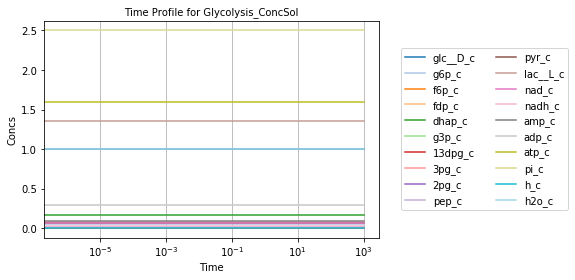

Model ID: Glycolysis_Hb


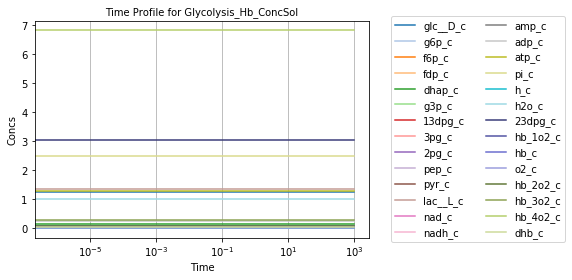

Model ID: Glycolysis_PFK


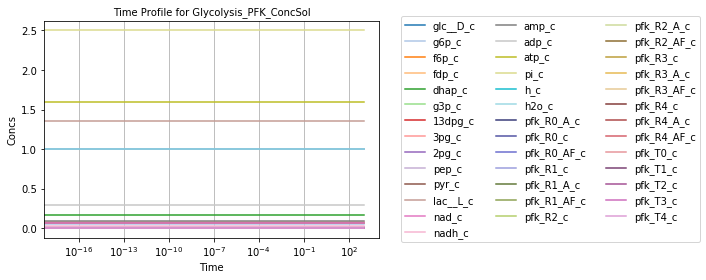

Model ID: Glycolysis_PYK


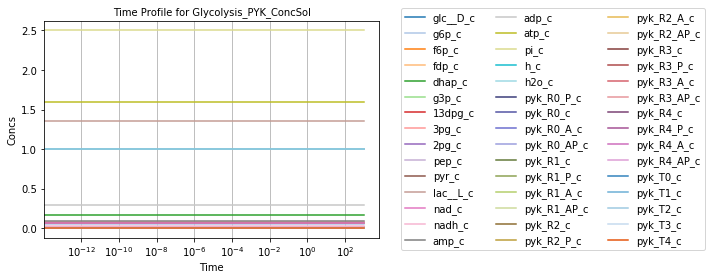

Model ID: Glycolysis_Hb_HEX1


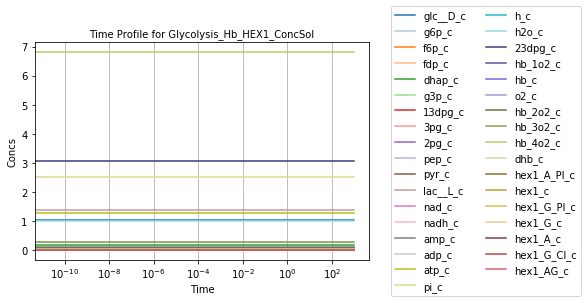

Model ID: Glycolysis_Hb_PFK


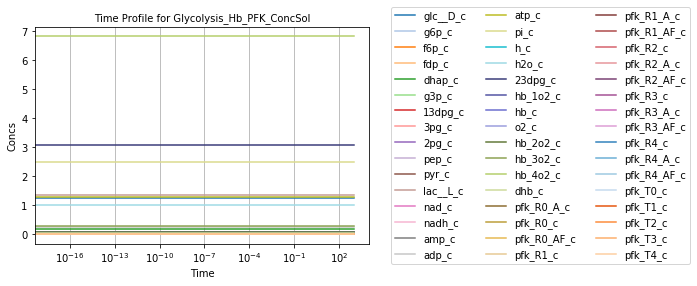

Model ID: Glycolysis_Hb_PYK


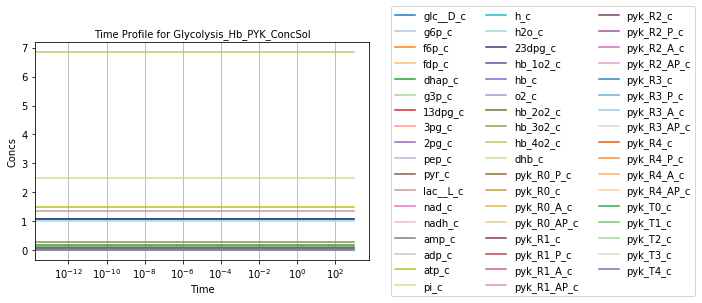

Model ID: Glycolysis_PFK_PYK


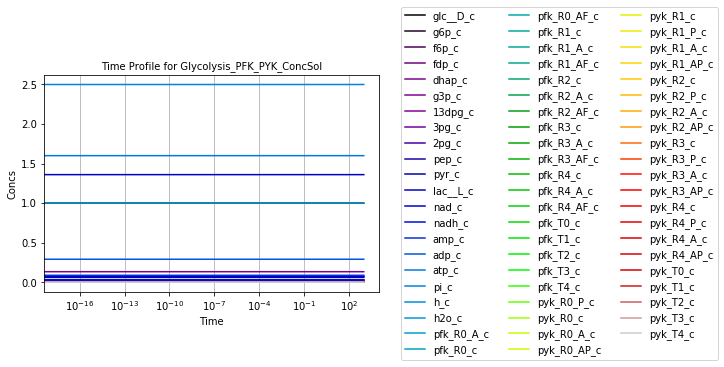

Model ID: Glycolysis_Hb_PFK_PYK


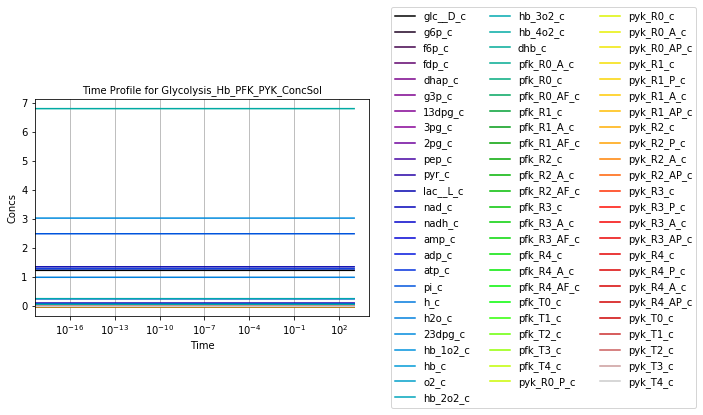

Model ID: Glycolysis_Hb_HEX1_PFK


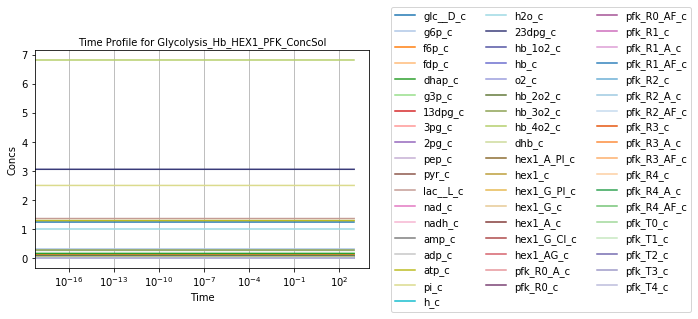

Model ID: Glycolysis_Hb_HEX1_PYK


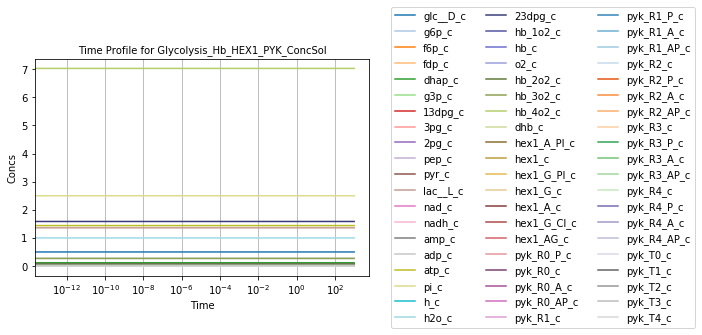

Model ID: Glycolysis_Hb_HEX1_PFK_PYK


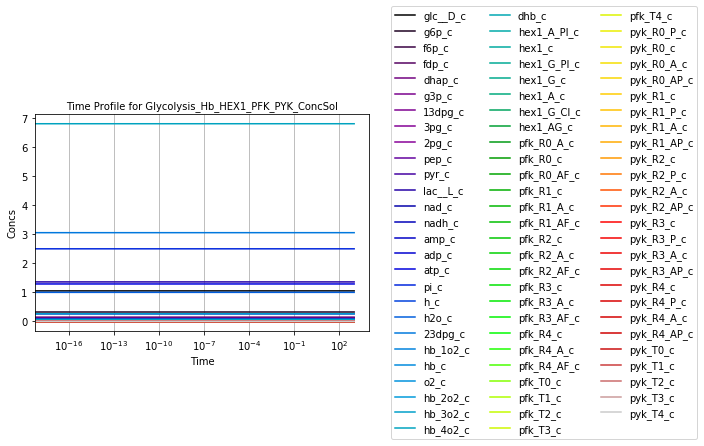

In [23]:
cp_sim.simulate(time=(0, 1e3), verbose=True);
print("Finished\n")
for model, conc_sol in cp_sim.get_concentration_solutions().items():
    print("Model ID: " + str(model))
    conc_sol.preview_time_profile
    plt.show()

## Export CP models

In [24]:
for model in cp_models:
    filename = make_path(
        "catalytic-potential", "all-models",
        "non-personalized-models", model.id.lower() + ".json")
    json.save_json_model(model, filename)
    print("Saved {0}".format(model.id, filename[filename.find("/all-models"):]))

Saved Glycolysis
Saved Glycolysis_Hb
Saved Glycolysis_PFK
Saved Glycolysis_PYK
Saved Glycolysis_Hb_HEX1
Saved Glycolysis_Hb_PFK
Saved Glycolysis_Hb_PYK
Saved Glycolysis_PFK_PYK
Saved Glycolysis_Hb_PFK_PYK
Saved Glycolysis_Hb_HEX1_PFK
Saved Glycolysis_Hb_HEX1_PYK
Saved Glycolysis_Hb_HEX1_PFK_PYK
